## Imports

In [1]:
import os
import numpy as np
import time
import gym

## Carga del modelo construido desde el archivo .npy

In [2]:
if os.path.exists('TrainedQ.npy'):
    trainedQ = np.load('TrainedQ.npy')
trainedQ.shape

(5, 4, 9, 6, 2)

## Pruebas sobre el modelo entrenado.

### Contenedores utilizados para discretizar

In [3]:
cart_position_bins = np.linspace(-2.4, 2.4, 4)
cart_acc_bins = np.linspace(-100, 100, 3)
pole_angle_bins = np.linspace(-.2,.2, 8)
angular_acc_bins = np.linspace(-5000, 5000, 5)

In [4]:
def get_state(obs):
    cart_pos = np.digitize(obs[0], cart_position_bins)
    cart_acc = np.digitize(obs[1], cart_acc_bins)
    pole_ang = np.digitize(obs[2], pole_angle_bins)
    ang_acc = np.digitize(obs[3], angular_acc_bins)
    state = tuple([cart_pos, cart_acc, pole_ang, ang_acc])
    return state

### Resultado promedio de recompensas de la ejecucion del modelo entrenado en 100 episodios

In [5]:
def optimal_policy(state, Q):
    action = np.argmax(Q[state])
    return action

In [26]:
env = gym.make('CartPole-v1', new_step_api=True)
tries = 1000
rewards = np.zeros(tries)
for i in range(tries):
    episode_reward= 0
    obs = env.reset(seed = i)
    done = False
    while not done:
        state = get_state(obs)
        action = optimal_policy(state, trainedQ)
        obs, reward, termination, truncation, info = env.step(action)
        done = termination or truncation
        episode_reward += reward
    rewards[i] = episode_reward
env.close()

In [35]:
print('Porcentaje de éxito (recompensas de 500): ', (np.count_nonzero(rewards == 500)/tries) * 100, '%')
print("Recompensa promedio: ", np.mean(rewards))
print('Peor recompensa: ', np.min(rewards))
print('Semilla del peor resultado: ', np.argmin(rewards))
print('Elementos que no llegaron a 500: ', np.count_nonzero(rewards != 500))

Porcentaje de éxito (recompensas de 500):  99.0 %
Recompensa promedio:  498.356
Peor recompensa:  268.0
Semilla del peor resultado:  165
Elementos que no llegaron a 500:  10


In [9]:
def plot(x,y, x_text, y_text, title):
    import matplotlib.pyplot as plt
    scatter = plt.scatter(x, y, color ="green", s = 10)
    plt.title(title)
    plt.xlabel(x_text)
    plt.ylabel(y_text)
    plt.scatter(x, y, color ="green", s = 10)
    plt.show()

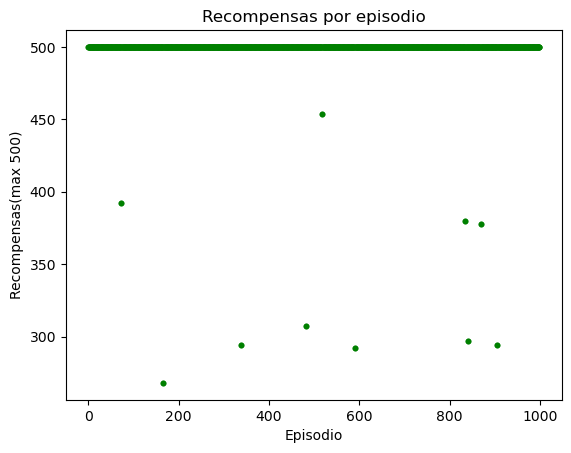

In [17]:
plot(range(tries), rewards, "Episodio", "Recompensas(max 500)", "Recompensas por episodio")

## Visualización de una corrida con la policy optima obtenida con renderizado en modo humano

In [33]:
best_seed = np.argmax(rewards).item()
worst_seed = np.argmin(rewards).item()
#Cambiar esta variable para ver el mejor o peor resultado
isBestRun = True

In [34]:
env = gym.make('CartPole-v1', render_mode='human', new_step_api=True)
episode_reward = 0
if isBestRun:
    obs = env.reset(seed = best_seed)
else:
    obs = env.reset(seed = worst_seed)
done = False
while not done:
    state = get_state(obs)
    action = optimal_policy(state, trainedQ)
    obs, reward, termination, truncation, info = env.step(action)
    done = termination or truncation
    episode_reward += reward
env.close()
print('Reward: ', episode_reward)

Reward:  500.0
